In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [125]:
df=pd.read_csv('/content/Detailed-Sales-Report.csv')
df

,SNO,DATE,INVOICE_NO,CLIENT,PRODUCT,PRODUCT_CODE,QUANTITY,RATE,DISCOUNT,TAXABLE,TAX,AMOUNT_AFTER_TAX
0,1,11-08-2023,INV11,Ashiq,Maaza big,NaN,1,20,0,20,0,20
1,2,11-08-2023,INV11,Ashiq,Watermelon Juice,1.0,2,40,0,80,0,80
2,3,11-08-2023,INV12,Ashiq,Maaza big,NaN,1,20,0,20,0,20
3,4,11-08-2023,INV13,Ashiq,Muskmelon Juice,2.0,3,40,0,120,0,120
4,5,11-08-2023,INV13,Ashiq,Chocolate milkshake,NaN,1,75,0,75,0,75
...,...,...,...,...,...,...,...,...,...,...,...,...
3374,3375,08-09-2023,INV2260,Swetha,Rose milk,NaN,1,45,0,45,0,45
3375,3376,08-09-2023,INV2260,Swetha,Musambi juice,NaN,1,50,0,50,0,50
3376,3377,08-09-2023,INV2261,Akshitha,Rose milk,NaN,3,45,0,135,0,135
3377,3378,08-09-2023,INV2262,Moshika,Bread omlette,NaN,1,60,0,60,0,60


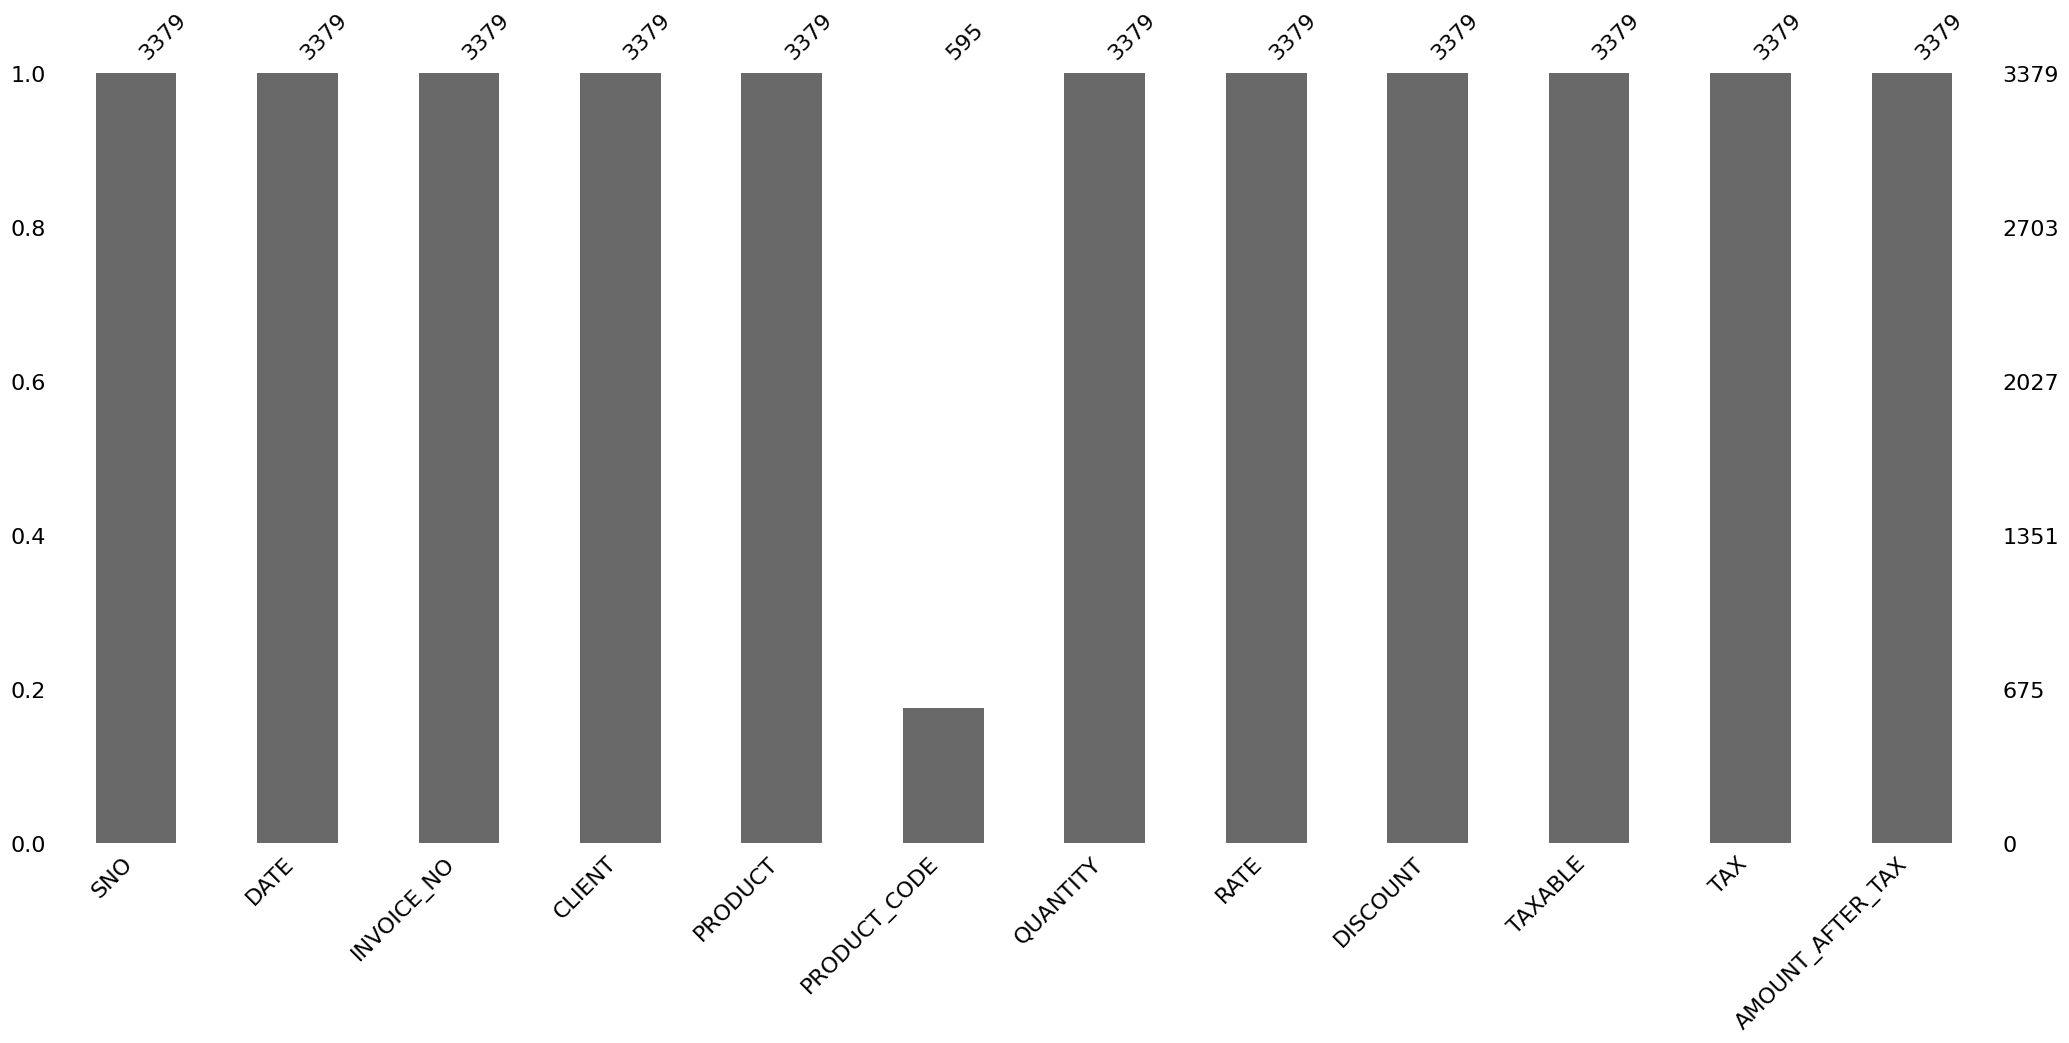

In [126]:
#finding_the_missing_values
import missingno as msno
msno.bar(df)
plt.show()

In [127]:
#Dropping_the_table_with_more_missing_values
df.drop('PRODUCT_CODE',axis=1)

,SNO,DATE,INVOICE_NO,CLIENT,PRODUCT,QUANTITY,RATE,DISCOUNT,TAXABLE,TAX,AMOUNT_AFTER_TAX
0,1,11-08-2023,INV11,Ashiq,Maaza big,1,20,0,20,0,20
1,2,11-08-2023,INV11,Ashiq,Watermelon Juice,2,40,0,80,0,80
2,3,11-08-2023,INV12,Ashiq,Maaza big,1,20,0,20,0,20
3,4,11-08-2023,INV13,Ashiq,Muskmelon Juice,3,40,0,120,0,120
4,5,11-08-2023,INV13,Ashiq,Chocolate milkshake,1,75,0,75,0,75
...,...,...,...,...,...,...,...,...,...,...,...
3374,3375,08-09-2023,INV2260,Swetha,Rose milk,1,45,0,45,0,45
3375,3376,08-09-2023,INV2260,Swetha,Musambi juice,1,50,0,50,0,50
3376,3377,08-09-2023,INV2261,Akshitha,Rose milk,3,45,0,135,0,135
3377,3378,08-09-2023,INV2262,Moshika,Bread omlette,1,60,0,60,0,60


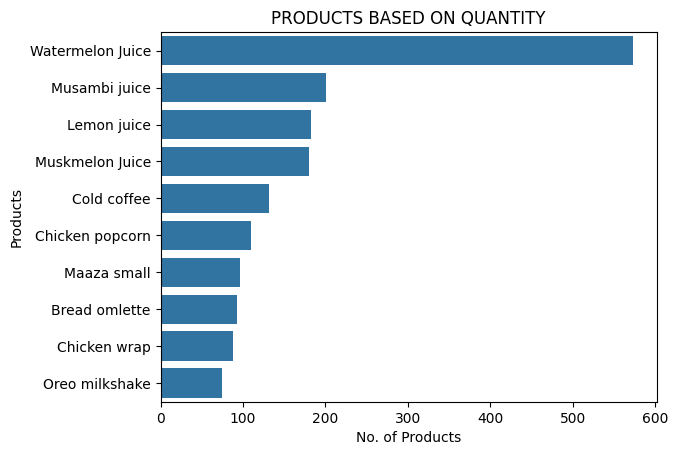

PRODUCT
Watermelon Juice    573
Musambi juice       201
Lemon juice         182
Muskmelon Juice     180
Cold coffee         132
Chicken popcorn     110
Maaza small          96
Bread omlette        93
Chicken wrap         88
Oreo milkshake       75
Name: QUANTITY, dtype: int64

In [128]:
#Top_10_PRODUCTS_BASED_ON_(QUANTITY)
a=df.groupby('PRODUCT')['QUANTITY'].sum().nlargest(10)
sns.barplot(x=a.values,y=a.index)
plt.xlabel('No. of Products')
plt.ylabel('Products')
plt.title('PRODUCTS BASED ON QUANTITY')
plt.show()
a

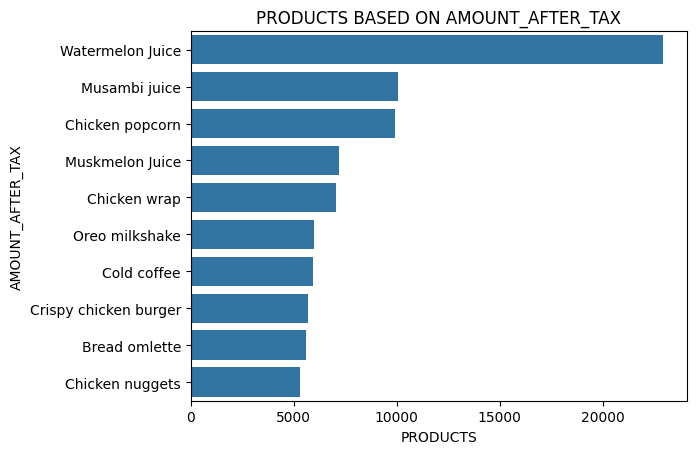

PRODUCT
Watermelon Juice         22920
Musambi juice            10050
Chicken popcorn           9900
Muskmelon Juice           7200
Chicken wrap              7040
Oreo milkshake            6000
Cold coffee               5940
Crispy chicken burger     5700
Bread omlette             5580
Chicken nuggets           5325
Name: AMOUNT_AFTER_TAX, dtype: int64

In [146]:
#Top_10_PRODUCTS_BASED_ON_(AMOUNT_AFTER_TAX)
b=df.groupby('PRODUCT')['AMOUNT_AFTER_TAX'].sum().nlargest(10)
sns.barplot(x=b.values,y=b.index)
plt.title('PRODUCTS BASED ON AMOUNT_AFTER_TAX')
plt.xlabel('PRODUCTS')
plt.ylabel('AMOUNT_AFTER_TAX')
plt.show()
b

In [144]:
#Average_Order_Value
avg1=df['AMOUNT_AFTER_TAX'].sum()
avg2=df['INVOICE_NO'].nunique()
avg=avg1/avg2
print("Average_Order_Value:",avg)

Average_Order_Value: 97.52268602540835


In [131]:
#[TOTAL_QUANTITY]_and_[AMOUNT_AFTER_TAX]_of_Chicken momos
c=df[df['PRODUCT']=='Chicken momos']
c1=c.groupby('PRODUCT').agg({'QUANTITY': lambda x:x.sum(),
                            'AMOUNT_AFTER_TAX': lambda x:x.sum()})
c1.columns=['NUMBER_OF_ITEMS_ORDERED','TOTAL_AMOUNT']
c1

,NUMBER_OF_ITEMS_ORDERED,TOTAL_AMOUNT
PRODUCT,,
Chicken momos,32,2880


In [132]:
#Total_Spendings_of_[CLIENT]_Reshma
d=df[df['CLIENT']=='Reshma']
d1=d.groupby('CLIENT').agg({'AMOUNT_AFTER_TAX': lambda x:x.sum()})
d1.columns=['TOTAL_AMOUNT']
d1

,TOTAL_AMOUNT
CLIENT,
Reshma,460


In [133]:
#No._of_Muskmelon_Juice_bought_by_[CLIENT]_Pooja
e=df[(df['CLIENT']=='Pooja') & (df['PRODUCT']=='Muskmelon Juice')]
e1=e.groupby('CLIENT').agg({'QUANTITY':lambda x:x.sum()})
e1.columns=['NUMBER_OF_ITEMS_ORDERED']
e1

,NUMBER_OF_ITEMS_ORDERED
CLIENT,
Pooja,1


In [134]:
#Total_[AMOUNT_AFTER_TAX]_by_Cotton_Candy_Buyers
f=df[df['PRODUCT']=='Cotton Candy']
f1=f.groupby('PRODUCT').agg({'AMOUNT_AFTER_TAX':lambda x:x.sum()})
f1.columns=['TOTAL_AMOUNT']
f1

,TOTAL_AMOUNT
PRODUCT,
Cotton Candy,210


In [135]:
#Client_Name_of_INV993
g=df[df['INVOICE_NO']=='INV993']
g1=g.groupby('INVOICE_NO').agg({'CLIENT':lambda x:x.unique()})
g1.columns=['CLIENT_NAME']
g1

,CLIENT_NAME
INVOICE_NO,
INV993,[Monika]


In [136]:
#No._of_times_Ajay_arrived_to_the_shop
h=df[df['CLIENT']=='Ajay']
h1=h.groupby('CLIENT').agg({'INVOICE_NO':lambda x:x.nunique()})
h1.columns=['NO_OF_TIMES_ARRIVED']
h1

,NO_OF_TIMES_ARRIVED
CLIENT,
Ajay,11


In [137]:
#Top_5_most_Discounts
df['DISCOUNT'].nlargest(5)

0    0
1    0
2    0
3    0
4    0
Name: DISCOUNT, dtype: int64

In [143]:
#Buyers_of_both_Watermelon_Juice_and_Muskmelon_Juice
i=df[(df['PRODUCT']=='Muskmelon Juice') & (df['PRODUCT']=='Watermelon Juice')]
i2=i['INVOICE_NO'].nunique()
print("Buyers of both Watermelon_Juice and Muskmelon_Juice:",i2)

Buyers of both Watermelon_Juice and Muskmelon_Juice: 0


In [142]:
#Buyers_of_either_Watermelon_Juice_or_Muskmelon_Juice
j=df[(df['PRODUCT']=='Muskmelon Juice') | (df['PRODUCT']=='Watermelon Juice')]
j2=i['INVOICE_NO'].nunique()
print("Buyers of either Watermelon_Juice or Muskmelon_Juice:",j2)

Buyers of either Watermelon_Juice or Muskmelon_Juice 531
